#Topic Modelling

Rereferences:
https://radimrehurek.com/gensim/models/ldamodel.html

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tokenize, remove stopwords, non-alphabetic words, lowercase

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Texts Analytics and Business Applications/Colab Code/booksummary.csv")

In [4]:
df.head()

,summaries
0,Carly Beth Caldwell is an 11-year-old girl wh...
1,Danse Macabre appears to take place a few wee...
2,In order to avert the impending collapse of t...
3,"The novel begins in orbit above planet Reach,..."
4,The book begins with an example of the German...


###LDA

In [5]:
from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS

In [6]:
print(stopwords)

frozenset({'latter', 'ten', 'now', 'much', 'although', 'beforehand', 'anyhow', 'had', 'once', 'per', 'amongst', 'around', 'upon', 'never', 'becoming', 'or', 'my', 'everything', 'more', 'who', 'whoever', 'thereby', 'been', 'mill', 'our', 'done', 'could', 'some', 'via', 'inc', 'cry', 'meanwhile', 'one', 'everywhere', 'others', 'at', 'fifty', 'see', 'hers', 'amoungst', 'yet', 'until', 'sometime', 'might', 'would', 'those', 'whereby', 'de', 'out', 'least', 'toward', 'every', 'as', 'also', 'the', 'myself', 'couldnt', 'nevertheless', 'serious', 'do', 'thereupon', 'etc', 'therefore', 'alone', 'hence', 'thin', 'over', 'all', 'name', 'give', 'fill', 'formerly', 'somehow', 'i', 'seems', 'anyway', 'down', 'from', 'neither', 'this', 'first', 'these', 'than', 'we', 'whereupon', 'ltd', 'thence', 'hasnt', 'together', 'amount', 'former', 'found', 'if', 'a', 'front', 'hereafter', 'because', 'such', 'top', 'by', 'above', 'noone', 'me', 'made', 'hundred', 'against', 'behind', 'part', 'therein', 'are', 's

In [7]:
def preprocess(textstring):
   tokens = word_tokenize(textstring)
   return [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]

In [8]:
df['processed_summary'] = df['summaries'].map(lambda x: preprocess(x))

In [9]:
df.head()

,summaries,processed_summary
0,Carly Beth Caldwell is an 11-year-old girl wh...,"[carly, beth, caldwell, girl, target, pranks, ..."
1,Danse Macabre appears to take place a few wee...,"[danse, macabre, appears, place, weeks, events..."
2,In order to avert the impending collapse of t...,"[order, avert, impending, collapse, multiverse..."
3,"The novel begins in orbit above planet Reach,...","[novel, begins, orbit, planet, reach, humanity..."
4,The book begins with an example of the German...,"[book, begins, example, german, refusal, surre..."


In [10]:
data_words = df['processed_summary'].values.tolist()

In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

**chunksize** controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory.

**passes** controls how often we train the model on the entire corpus (set to 10). Another word for passes might be “epochs”. iterations is somewhat technical, but essentially it controls how often we repeat a particular loop over each document. It is important to set the number of “passes” and “iterations” high enough.

**Print out the top ten words in each topic**

In [12]:
for idx in range(10):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.007*"new" + 0.006*"people" + 0.006*"book" + 0.006*"war" + 0.006*"chapter" + 0.006*"world" + 0.004*"novel" + 0.004*"government" + 0.004*"states" + 0.004*"time"
Topic #1: 0.004*"time" + 0.004*"tells" + 0.004*"man" + 0.004*"finds" + 0.004*"house" + 0.004*"later" + 0.003*"does" + 0.003*"night" + 0.003*"father" + 0.003*"way"
Topic #2: 0.022*"arthur" + 0.016*"leo" + 0.013*"ruby" + 0.011*"lin" + 0.010*"rat" + 0.010*"ix" + 0.009*"rose" + 0.009*"uhtred" + 0.009*"bone" + 0.009*"phoney"
Topic #3: 0.010*"book" + 0.010*"david" + 0.010*"life" + 0.009*"story" + 0.009*"novel" + 0.008*"family" + 0.007*"school" + 0.007*"mother" + 0.007*"s" + 0.006*"children"
Topic #4: 0.023*"bobby" + 0.014*"mia" + 0.007*"matilda" + 0.007*"stake" + 0.006*"eelong" + 0.004*"brett" + 0.004*"lilly" + 0.004*"topics" + 0.003*"magistrate" + 0.003*"dee"
Topic #5: 0.018*"treesong" + 0.014*"gersen" + 0.014*"rachel" + 0.009*"manuel" + 0.007*"flora" + 0.006*"theatre" + 0.005*"ax" + 0.005*"marco" + 0.005*"adrian" + 0.004*

**Coherence Score**
A model with higher coherence score is preferred.

In [15]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.507451463044166


**Perplexity** A model with lower perplexity score is preferred.

In [16]:
lda_model.log_perplexity(corpus)

-10.50498120851481

**Get the topic distribution for all documents**

In [17]:
topic_distributions = [lda_model.get_document_topics(doc,minimum_probability=0.0) for doc in corpus]

In [18]:
# check the topic distribution for document 0
print(topic_distributions[0])

[(0, 0.009094642), (1, 0.43530324), (2, 0.00068244594), (3, 0.38088396), (4, 0.0006824463), (5, 0.0006824463), (6, 0.00068246096), (7, 0.00068247935), (8, 0.12773162), (9, 0.043574266)]


In [19]:
topic_distributions_dict = []
for doc_topics in topic_distributions:
    doc_topic_dict = {f"Topic {topic[0]+1}": topic[1] for topic in doc_topics}
    topic_distributions_dict.append(doc_topic_dict)

# Create a DataFrame
df_topic = pd.DataFrame(topic_distributions_dict)

In [20]:
df_topic['summaries'] = df['summaries']
df_topic.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,summaries
0,0.009095,0.435303,0.000682,0.380884,0.000682,0.000682,0.000682,0.000682,0.127732,0.043574,Carly Beth Caldwell is an 11-year-old girl wh...
1,0.102665,0.774365,0.005213,0.075344,0.000249,0.000249,0.002218,0.039201,0.000249,0.000249,Danse Macabre appears to take place a few wee...
2,0.002084,0.261583,0.002084,0.423705,0.002084,0.002084,0.002084,0.300127,0.002084,0.002084,In order to avert the impending collapse of t...
3,0.103837,0.340589,0.000360,0.000361,0.000360,0.001941,0.009737,0.542094,0.000360,0.000360,"The novel begins in orbit above planet Reach,..."
4,0.512321,0.479046,0.000478,0.000478,0.000478,0.000478,0.005288,0.000478,0.000478,0.000478,The book begins with an example of the German...


**Hyperparameter Tuning**

In [21]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

In [32]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)

model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterate through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus, dictionary=id2word,
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)

                pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [18:32<00:00, 61.81s/it]


In [33]:
model_results = pd.DataFrame(model_results)
model_results

,Topics,Alpha,Beta,Coherence
0,2,0.01,0.1,0.316750
1,3,0.01,0.1,0.319544
2,4,0.01,0.1,0.412055
3,5,0.01,0.1,0.438103
4,6,0.01,0.1,0.447731
5,7,0.01,0.1,0.487505
6,8,0.01,0.1,0.444434
7,9,0.01,0.1,0.452326
8,10,0.01,0.1,0.519166
9,11,0.01,0.1,0.468959


**Visualze the changes in CV scores**

In [34]:
x_values = model_results['Topics'].values.tolist()
y_values = model_results['Coherence'].values.tolist()

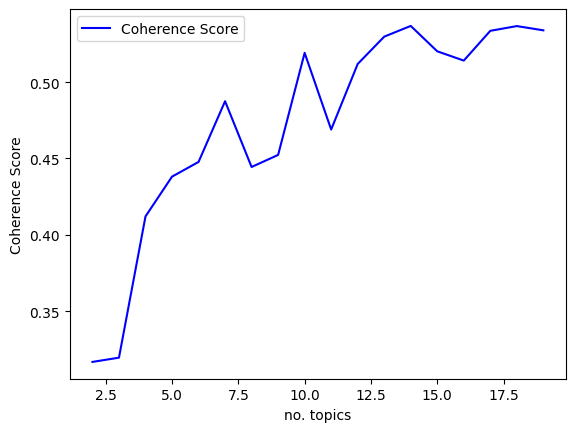

In [35]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()

With the coherence score seems to keep increasing with the number of topics, it may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=17.

**Visualize topic models**

In [13]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

In [14]:
# If failed, restart runtime and try again
lda_display = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Source: https://markroxor.github.io/gensim/static/notebooks/topic_coherence_tutorial.html
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0